### Problem Statement - Lending Club Case Study

# Introduction

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

In [23]:
# Importing all libraries required.
import numpy as np
import pandas as pd
import re

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Read CSV file
loan_df = pd.read_csv('Datasets/loan.csv',dtype=object)

In [26]:
# chaeck the shape
print(loan_df.shape)

(39717, 111)


# Data Cleaning

 1 Check for duplicate instances 


In [27]:
print(loan_df.duplicated(subset=None, keep='first').count())

39717


Observation- No Duplicated instances 


2.Check for empty rows 

In [28]:
print(loan_df.isnull().all(axis=1).sum())

0


Observation- No empty instances

3. Check for missing values 

In [29]:
print(loan_df.isnull().all(axis=0).sum())

54


Observation: There are 54 columns have all missing values.

4. List the sum of null values columnwise

In [30]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

Observation: Column with null values "desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim""mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit""member_id","url","emp_title","zip_code","tax_liens"

Action : drop the above columns

In [37]:
columns_drop_list1 = ["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim"]
loan_df.drop(labels = columns_drop_list1, axis =1, inplace=True)
columns_drop_list2 = ["mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]
loan_df.drop(labels = columns_drop_list2, axis =1, inplace=True)
columns_drop_list3 = ["member_id","url","emp_title","zip_code","tax_liens"]
loan_df.drop(labels = columns_drop_list3, axis =1, inplace=True)

In [38]:
loan_df.shape

(39717, 97)

 Observations : we are left with 97 columns

In [39]:
# remove % symbol from intrest rate column 
loan_df['int_rate'] = loan_df['int_rate'].str.rstrip('%')

# remove % symbol from revol_util column 
loan_df['revol_util'] = loan_df['revol_util'].str.rstrip('%')

In [42]:
# Manupulate the colums for numerical data 
loan_df.emp_length.fillna('0',inplace=True)
loan_df['emp_length']=loan_df.emp_length.str.extract('(\d+)')
cols = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan_df[cols] = loan_df[cols].apply(pd.to_numeric)


In [45]:
#summarise loan status
(loan_df.loan_status.value_counts()*100)/len(loan_df)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

Observations
82.961956 percent loans were fully paid.
14.167737 loans were charged off
2.870307 on track

In [47]:
#summarise the purpose of loan
(loan_df.purpose.value_counts()*100)/len(loan_df)

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

Observations :Most of the loans taken for debt consolidation

In [48]:
#Derived columns 2 more columns year and month
loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df['year']=loan_df['issue_d'].dt.year
loan_df['month']=loan_df['issue_d'].dt.month

In [49]:
loan_df.shape

(39717, 99)

# Univariate Analysis

In [51]:
loan_df['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

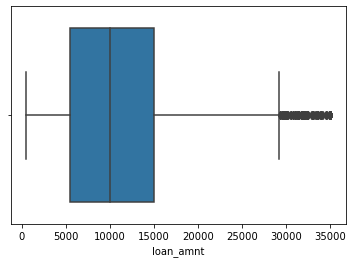

In [54]:
sns.boxplot(loan_df.loan_amnt)

In [52]:
loan_df['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

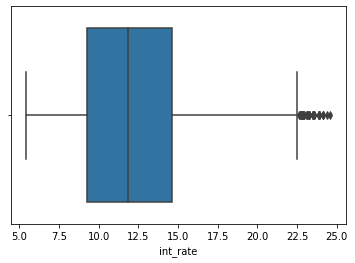

In [55]:
sns.boxplot(loan_df.int_rate)

In [53]:
loan_df['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

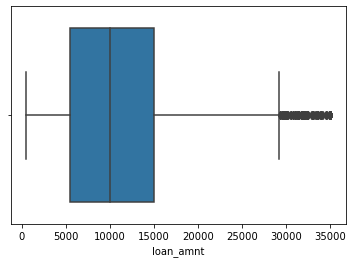

In [56]:
sns.boxplot(loan_df.loan_amnt)

In [60]:
# Remove Outliers
loan_df = loan_df[loan_df["annual_inc"] < loan_df["annual_inc"].quantile(0.99)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

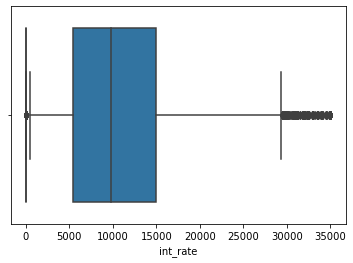

In [62]:
loan_df['loan_amnt'].describe()
sns.boxplot(loan_df.loan_amnt)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

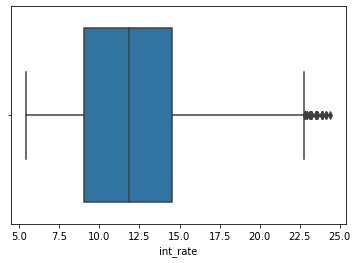

In [63]:
loan_df['int_rate'].describe()
sns.boxplot(loan_df.int_rate)

Observations :data looks much better

#  Bivariate Analysis-Correlation Matrix

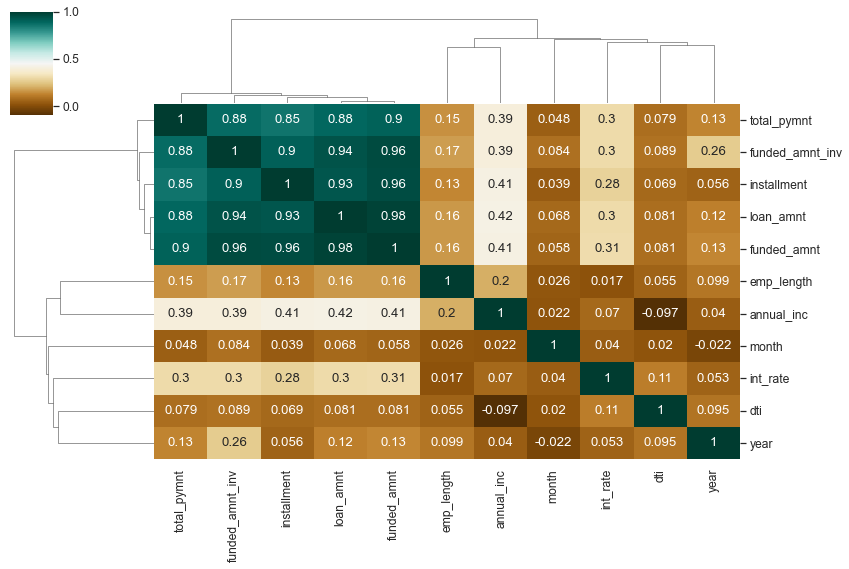

In [64]:
loan_correlation = loan_df.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

Observation
* Loan amount, investor amount, funding amount are strongly correlated.
* Annual income with DTI(Debt-to-income ratio) is negatively correalted.